# Size Reduction

In [1]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal
from sklearn.metrics import roc_curve, auc

In [2]:
import keras 
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, metrics, regularizers
from keras.models import Model, load_model, clone_model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Abnormalities

In [3]:
abnor = {'AF': 164890007, 'AFIB': 164889003,'SB': 426177001,'SR': 426783006 ,'ST': 427084000,'SVT':426761007}

classi = [164890007,164889003,426177001,426783006,427084000,426761007]
class_d = {164890007:0, 164889003:1, 426177001:2, 426783006:3, 427084000:4, 426761007:5}

# Load the data 

In [4]:
path = 'E:/12345/Chapman_Train_Val_Test/'
x_train = np.load(path+'x_train.npy')
x_test = np.load(path+'x_test.npy')
y_train = np.load(path+'y_train.npy')
y_test = np.load(path+'y_test.npy')
x_val = np.load(path+'x_val.npy')
y_val = np.load(path+'y_val.npy')

In [5]:
path = 'E:/12345/Chapman_Train_Val_Test/'

l0_x_train = np.load(path+'l0_x_train1.npy')
l0_x_test = np.load(path+'l0_x_test.npy')
l0_y_train = np.load(path+'l0_y_train1.npy')
l0_y_test = np.load(path+'l0_y_test.npy')
l0_x_val =  np.load(path+'l0_x_val.npy')
l0_y_val = np.load(path+'l0_y_val.npy')


l1_x_train = np.load(path+'l1_x_train1.npy')
l1_x_test = np.load(path+'l1_x_test.npy')
l1_y_train = np.load(path+'l1_y_train1.npy')
l1_y_test = np.load(path+'l1_y_test.npy')
l1_x_val =  np.load(path+'l1_x_val.npy')
l1_y_val = np.load(path+'l1_y_val.npy')

l2_x_train = np.load(path+'l2_x_train1.npy')
l2_x_test = np.load(path+'l2_x_test.npy')
l2_y_train = np.load(path+'l2_y_train1.npy')
l2_y_test = np.load(path+'l2_y_test.npy')
l2_x_val =  np.load(path+'l2_x_val.npy')
l2_y_val = np.load(path+'l2_y_val.npy')

l3_x_train = np.load(path+'l3_x_train1.npy')
l3_x_test = np.load(path+'l3_x_test.npy')
l3_y_train = np.load(path+'l3_y_train1.npy')
l3_y_test = np.load(path+'l3_y_test.npy')
l3_x_val =  np.load(path+'l3_x_val.npy')
l3_y_val = np.load(path+'l3_y_val.npy')

l4_x_train = np.load(path+'l4_x_train1.npy')
l4_x_test = np.load(path+'l4_x_test.npy')
l4_y_train = np.load(path+'l4_y_train1.npy')
l4_y_test = np.load(path+'l4_y_test.npy')
l4_x_val =  np.load(path+'l4_x_val.npy')
l4_y_val = np.load(path+'l4_y_val.npy')

l5_x_train = np.load(path+'l5_x_train1.npy')
l5_x_test = np.load(path+'l5_x_test.npy')
l5_y_train = np.load(path+'l5_y_train1.npy')
l5_y_test = np.load(path+'l5_y_test.npy')
l5_x_val =  np.load(path+'l5_x_val.npy')
l5_y_val = np.load(path+'l5_y_val.npy')

l6_x_train = np.load(path+'l6_x_train1.npy')
l6_x_test = np.load(path+'l6_x_test.npy')
l6_y_train = np.load(path+'l6_y_train1.npy')
l6_y_test = np.load(path+'l6_y_test.npy')
l6_x_val =  np.load(path+'l6_x_val.npy')
l6_y_val = np.load(path+'l6_y_val.npy')

l7_x_train = np.load(path+'l7_x_train1.npy')
l7_x_test = np.load(path+'l7_x_test.npy')
l7_y_train = np.load(path+'l7_y_train1.npy')
l7_y_test = np.load(path+'l7_y_test.npy')
l7_x_val =  np.load(path+'l7_x_val.npy')
l7_y_val = np.load(path+'l7_y_val.npy')

l8_x_train = np.load(path+'l8_x_train1.npy')
l8_x_test = np.load(path+'l8_x_test.npy')
l8_y_train = np.load(path+'l8_y_train1.npy')
l8_y_test = np.load(path+'l8_y_test.npy')
l8_x_val =  np.load(path+'l8_x_val.npy')
l8_y_val = np.load(path+'l8_y_val.npy')

l9_x_train = np.load(path+'l9_x_train1.npy')
l9_x_test = np.load(path+'l9_x_test.npy')
l9_y_train = np.load(path+'l9_y_train1.npy')
l9_y_test = np.load(path+'l9_y_test.npy')
l9_x_val =  np.load(path+'l9_x_val.npy')
l9_y_val = np.load(path+'l9_y_val.npy')

l10_x_train = np.load(path+'l10_x_train1.npy')
l10_x_test = np.load(path+'l10_x_test.npy')
l10_y_train = np.load(path+'l10_y_train1.npy')
l10_y_test = np.load(path+'l10_y_test.npy')
l10_x_val =  np.load(path+'l10_x_val.npy')
l10_y_val = np.load(path+'l10_y_val.npy')

l11_x_train = np.load(path+'l11_x_train1.npy')
l11_x_test = np.load(path+'l11_x_test.npy')
l11_y_train = np.load(path+'l11_y_train1.npy')
l11_y_test = np.load(path+'l11_y_test.npy')
l11_x_val =  np.load(path+'l11_x_val.npy')
l11_y_val = np.load(path+'l11_y_val.npy')

In [6]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_val = y_val.flatten()
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_val = y_val.astype(int)

l0_y_train = l0_y_train.flatten()
l0_y_test = l0_y_test.flatten()
l0_y_val = l0_y_val.flatten()
l0_y_train= l0_y_train.astype(int)
l0_y_test = l0_y_test.astype(int)
l0_y_val = l0_y_val.astype(int)


l1_y_train = l1_y_train.flatten()
l1_y_test = l1_y_test.flatten()
l1_y_val = l1_y_val.flatten()
l1_y_train = l1_y_train.astype(int)
l1_y_test = l1_y_test.astype(int)
l1_y_val = l1_y_val.astype(int)


l2_y_train = l2_y_train.flatten()
l2_y_test = l2_y_test.flatten()
l2_y_val = l2_y_val.flatten()
l2_y_train = l2_y_train.astype(int)
l2_y_test = l2_y_test.astype(int)
l2_y_val = l2_y_val.astype(int)

l3_y_train = l3_y_train.flatten()
l3_y_test = l3_y_test.flatten()
l3_y_val = l3_y_val.flatten()
l3_y_train = l3_y_train.astype(int)
l3_y_test = l3_y_test.astype(int)
l3_y_val = l3_y_val.astype(int)

l4_y_train = l4_y_train.flatten()
l4_y_test = l4_y_test.flatten()
l4_y_val = l4_y_val.flatten()
l4_y_train = l4_y_train.astype(int)
l4_y_test = l4_y_test.astype(int)
l4_y_val = l4_y_val.astype(int)

l5_y_train = l5_y_train.flatten()
l5_y_test = l5_y_test.flatten()
l5_y_val = l5_y_val.flatten()
l5_y_train= l5_y_train.astype(int)
l5_y_test = l5_y_test.astype(int)
l5_y_val = l5_y_val.astype(int)

l6_y_train = l6_y_train.flatten()
l6_y_test = l6_y_test.flatten()
l6_y_val = l6_y_val.flatten()
l6_y_train= l6_y_train.astype(int)
l6_y_test = l6_y_test.astype(int)
l6_y_val = l6_y_val.astype(int)

l7_y_train = l7_y_train.flatten()
l7_y_test = l7_y_test.flatten()
l7_y_val = l7_y_val.flatten()
l7_y_train= l7_y_train.astype(int)
l7_y_test = l7_y_test.astype(int)
l7_y_val = l7_y_val.astype(int)

l8_y_train = l8_y_train.flatten()
l8_y_test = l8_y_test.flatten()
l8_y_val = l8_y_val.flatten()
l8_y_train= l8_y_train.astype(int)
l8_y_test = l8_y_test.astype(int)
l8_y_val = l8_y_val.astype(int)

l9_y_train = l9_y_train.flatten()
l9_y_test = l9_y_test.flatten()
l9_y_val = l9_y_val.flatten()
l9_y_train = l9_y_train.astype(int)
l9_y_test = l9_y_test.astype(int)
l9_y_val = l9_y_val.astype(int)

l10_y_train = l10_y_train.flatten()
l10_y_test = l10_y_test.flatten()
l10_y_val = l10_y_val.flatten()
l10_y_train = l10_y_train.astype(int)
l10_y_test = l10_y_test.astype(int)
l10_y_val = l10_y_val.astype(int)

l11_y_train = l11_y_train.flatten()
l11_y_test = l11_y_test.flatten()
l11_y_val = l11_y_val.flatten()
l11_y_train= l11_y_train.astype(int)
l11_y_test = l11_y_test.astype(int)
l11_y_val = l11_y_val.astype(int)


In [7]:
x_train = x_train.reshape(7026,5000,12)
x_test = x_test.reshape(2019,5000,12)
x_val = x_val.reshape(1050,5000,12)
y_train = y_train.reshape(7026,1)
y_test = y_test.reshape(2019,1)
y_val = y_val.reshape(1050,1)

l0_x_train = l0_x_train.reshape(7026,5000,1)
l0_x_test = l0_x_test.reshape(2019,5000,1)
l0_y_train = l0_y_train.reshape(7026,1)
l0_y_test = l0_y_test.reshape(2019,1)
l0_x_val = l0_x_val.reshape(1050,5000,1)
l0_y_val = l0_y_val.reshape(1050,1)

l1_x_train = l1_x_train.reshape(7026,5000,1)
l1_x_test = l1_x_test.reshape(2019,5000,1)
l1_y_train = l1_y_train.reshape(7026,1)
l1_y_test = l1_y_test.reshape(2019,1)
l1_x_val = l1_x_val.reshape(1050,5000,1)
l1_y_val = l1_y_val.reshape(1050,1)

l2_x_train = l2_x_train.reshape(7026,5000,1)
l2_x_test = l2_x_test.reshape(2019,5000,1)
l2_y_train = l2_y_train.reshape(7026,1)
l2_y_test = l2_y_test.reshape(2019,1)
l2_x_val = l2_x_val.reshape(1050,5000,1)
l2_y_val = l2_y_val.reshape(1050,1)

l3_x_train = l3_x_train.reshape(7026,5000,1)
l3_x_test = l3_x_test.reshape(2019,5000,1)
l3_y_train = l3_y_train.reshape(7026,1)
l3_y_test = l3_y_test.reshape(2019,1)
l3_x_val = l3_x_val.reshape(1050,5000,1)
l3_y_val = l3_y_val.reshape(1050,1)

l4_x_train = l4_x_train.reshape(7026,5000,1)
l4_x_test = l4_x_test.reshape(2019,5000,1)
l4_y_train = l4_y_train.reshape(7026,1)
l4_y_test = l4_y_test.reshape(2019,1)
l4_x_val = l4_x_val.reshape(1050,5000,1)
l4_y_val = l4_y_val.reshape(1050,1)

l5_x_train = l5_x_train.reshape(7026,5000,1)
l5_x_test = l5_x_test.reshape(2019,5000,1)
l5_y_train = l5_y_train.reshape(7026,1)
l5_y_test = l5_y_test.reshape(2019,1)
l5_x_val = l5_x_val.reshape(1050,5000,1)
l5_y_val = l5_y_val.reshape(1050,1)

l6_x_train = l6_x_train.reshape(7026,5000,1)
l6_x_test = l6_x_test.reshape(2019,5000,1)
l6_y_train = l6_y_train.reshape(7026,1)
l6_y_test = l6_y_test.reshape(2019,1)
l6_x_val = l6_x_val.reshape(1050,5000,1)
l6_y_val = l6_y_val.reshape(1050,1)

l7_x_train = l7_x_train.reshape(7026,5000,1)
l7_x_test = l7_x_test.reshape(2019,5000,1)
l7_y_train = l7_y_train.reshape(7026,1)
l7_y_test = l7_y_test.reshape(2019,1)
l7_x_val = l7_x_val.reshape(1050,5000,1)
l7_y_val = l7_y_val.reshape(1050,1)

l8_x_train = l8_x_train.reshape(7026,5000,1)
l8_x_test = l8_x_test.reshape(2019,5000,1)
l8_y_train = l8_y_train.reshape(7026,1)
l8_y_test = l8_y_test.reshape(2019,1)
l8_x_val = l8_x_val.reshape(1050,5000,1)
l8_y_val = l8_y_val.reshape(1050,1)

l9_x_train = l9_x_train.reshape(7026,5000,1)
l9_x_test = l9_x_test.reshape(2019,5000,1)
l9_y_train = l9_y_train.reshape(7026,1)
l9_y_test = l9_y_test.reshape(2019,1)
l9_x_val = l9_x_val.reshape(1050,5000,1)
l9_y_val = l9_y_val.reshape(1050,1)

l10_x_train = l10_x_train.reshape(7026,5000,1)
l10_x_test = l10_x_test.reshape(2019,5000,1)
l10_y_train = l10_y_train.reshape(7026,1)
l10_y_test = l10_y_test.reshape(2019,1)
l10_x_val = l10_x_val.reshape(1050,5000,1)
l10_y_val = l10_y_val.reshape(1050,1)

l11_x_train = l11_x_train.reshape(7026,5000,1)
l11_x_test = l11_x_test.reshape(2019,5000,1)
l11_y_train = l11_y_train.reshape(7026,1)
l11_y_test = l11_y_test.reshape(2019,1)
l11_x_val = l11_x_val.reshape(1050,5000,1)
l11_y_val = l11_y_val.reshape(1050,1)


# Distiller

In [8]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(self,optimizer,metrics,student_loss_fn,distillation_loss_fn,alpha=0.1,temperature=3):
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x,y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x[0], training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x[1], training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y[1], student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y[1], student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x,y = data
        # Compute predictions
        y_prediction = self.student(x[1], training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y[1], y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y[1], y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

# Teacher Model
<font color=#FF0000>**Model Sanji**</font>

In [9]:
teacher_final = keras.models.Sequential([
    keras.layers.Input(shape=(5000,12)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1,activation= 'relu'),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1,activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1,activation= 'relu'),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1,activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Dropout(0.2),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512,activation= 'relu'),  
    keras.layers.Dense(units=256,activation= 'relu'),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = 'teacher_joyboy',
)
teacher_final.build()

teacher_final.summary()

Model: "teacher_joyboy"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4998, 32)          1184      
                                                                 
 conv1d_1 (Conv1D)           (None, 4996, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1665, 32)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 1663, 64)          6208      
                                                                 
 conv1d_3 (Conv1D)           (None, 1661, 64)          12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 553, 64)          0         
 1D)                                                

In [12]:
opti = keras.optimizers.Adam(learning_rate=0.001)
teacher_final.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 20

history = teacher_final.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 76s 170ms/step - loss: 0.3092 - accuracy: 0.9001 - val_loss: 0.3013 - val_accuracy: 0.9076
Epoch 2/20
440/440 [==============================] - 74s 167ms/step - loss: 0.2910 - accuracy: 0.9089 - val_loss: 0.3434 - val_accuracy: 0.9057
Epoch 3/20
440/440 [==============================] - 73s 165ms/step - loss: 0.2703 - accuracy: 0.9136 - val_loss: 0.3382 - val_accuracy: 0.8914
Epoch 4/20
440/440 [==============================] - 73s 166ms/step - loss: 0.2803 - accuracy: 0.9102 - val_loss: 0.2532 - val_accuracy: 0.9171
Epoch 5/20
440/440 [==============================] - 74s 168ms/step - loss: 0.2530 - accuracy: 0.9155 - val_loss: 0.2427 - val_accuracy: 0.9276
Epoch 6/20
440/440 [==============================] - 78s 178ms/step - loss: 0.2291 - accuracy: 0.9213 - val_loss: 0.2203 - val_accuracy: 0.9248
Epoch 7/20
440/440 [==============================] - 81s 185ms/step - loss: 0.2083 - accuracy: 0.9294 - val_loss: 0.2130 - val_ac

In [13]:
teacher_final.evaluate(x_test, y_test)

64/64 [==============================] - 5s 75ms/step - loss: 0.1695 - accuracy: 0.9470


[0.16949665546417236, 0.9470034837722778]

Text(0, 0.5, 'Accuracy')

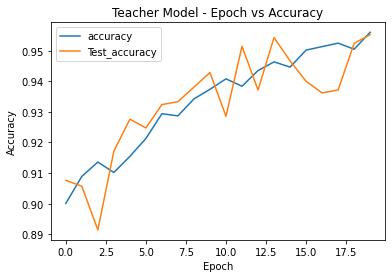

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Teacher Model - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

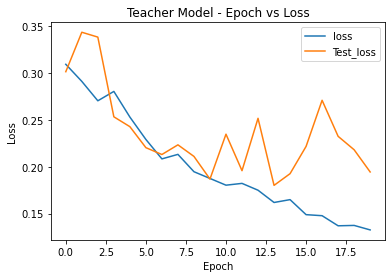

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Teacher Model - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [16]:
predictions = teacher_final.predict(x_test)
     

pred = np.argmax(predictions,axis=1)
# label
# y_test = np.argmax(y_test,axis=1)
     

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

64/64 [==============================] - 5s 75ms/step
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        85
           1       0.94      0.90      0.92       362
           2       0.98      1.00      0.99       769
           3       0.99      0.95      0.97       374
           4       0.93      0.99      0.96       317
           5       0.87      0.97      0.92       112

    accuracy                           0.95      2019
   macro avg       0.88      0.89      0.88      2019
weighted avg       0.95      0.95      0.95      2019



In [17]:
y_predicted =teacher_final.predict(x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)

64/64 [==============================] - 5s 74ms/step


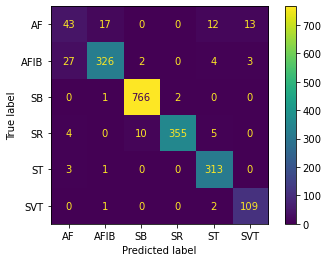

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

# Student Models
<font color=#FF0000>**Leads 1 to 12**</font>

In [19]:
stu_0 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '0',
)
stu_0.build()

stu_0.summary()

Model: "0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 2499, 32)         0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1248, 64)         0         
 1D)                                                             
                                                                 
 conv1d_12 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 623, 128)         0         

In [20]:
stu_1 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '1',
)
stu_1.build()

stu_1.summary()

Model: "1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 623, 128)         0         

In [21]:
stu_2 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '2',
)
stu_2.build()

stu_2.summary()

Model: "2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 623, 128)         0         

In [22]:
stu_3 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = 'student3',
)
stu_3.build()

stu_3.summary()

Model: "student3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_26 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_27 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 623, 128)         0  

In [23]:
stu_4 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = 'student4',
)
stu_4.build()

stu_4.summary()

Model: "student4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 623, 128)         0  

In [24]:
stu_5 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '5',
)
stu_5.build()

stu_5.summary()

Model: "5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_35 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_36 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_37 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_32 (MaxPoolin  (None, 623, 128)         0         

In [25]:
stu_6 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '6',
)
stu_6.build()

stu_6.summary()

Model: "6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_40 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_35 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_41 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_36 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_42 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_37 (MaxPoolin  (None, 623, 128)         0         

In [26]:
stu_7 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '7',
)
stu_7.build()

stu_7.summary()

Model: "7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_45 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_40 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_46 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_41 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_47 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_42 (MaxPoolin  (None, 623, 128)         0         

In [27]:
stu_8 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '8',
)
stu_8.build()

stu_8.summary()

Model: "8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_50 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_45 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_51 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_46 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_52 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_47 (MaxPoolin  (None, 623, 128)         0         

In [28]:
stu_9 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '9',
)
stu_9.build()

stu_9.summary()

Model: "9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_55 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_50 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_56 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_51 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_57 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 623, 128)         0         

In [29]:
stu_10 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '10',
)
stu_10.build()

stu_10.summary()

Model: "10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_60 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_55 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_61 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_56 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_62 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_57 (MaxPoolin  (None, 623, 128)         0        

In [30]:
stu_11 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=6,activation='softmax')
],
    name = '11',
)
stu_11.build()

stu_11.summary()

Model: "11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_65 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_60 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_66 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_61 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_67 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_62 (MaxPoolin  (None, 623, 128)         0        

# Training
<font color=#FF0000>**Student Models 1 to 12**</font>

In [31]:
BATCH = 16
EPOCHS = 20
opti = keras.optimizers.Adam(learning_rate=0.001)

In [32]:
stu_0.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist0 = stu_0.fit(l0_x_train, l0_y_train,validation_data=(l0_x_val,l0_y_val),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 73s 164ms/step - loss: 1.3568 - accuracy: 0.4734 - val_loss: 1.1203 - val_accuracy: 0.5790
Epoch 2/20
440/440 [==============================] - 72s 164ms/step - loss: 1.1220 - accuracy: 0.5595 - val_loss: 1.0426 - val_accuracy: 0.6019
Epoch 3/20
440/440 [==============================] - 78s 178ms/step - loss: 1.0685 - accuracy: 0.5803 - val_loss: 0.9709 - val_accuracy: 0.6476
Epoch 4/20
440/440 [==============================] - 73s 165ms/step - loss: 1.0072 - accuracy: 0.6045 - val_loss: 1.2441 - val_accuracy: 0.4752
Epoch 5/20
440/440 [==============================] - 72s 164ms/step - loss: 0.8206 - accuracy: 0.6923 - val_loss: 0.6550 - val_accuracy: 0.7743
Epoch 6/20
440/440 [==============================] - 72s 164ms/step - loss: 0.6711 - accuracy: 0.7551 - val_loss: 0.5870 - val_accuracy: 0.7962
Epoch 7/20
440/440 [==============================] - 72s 163ms/step - loss: 0.6058 - accuracy: 0.7709 - val_loss: 0.6428 - val_ac

In [33]:
stu_1.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist1 = stu_1.fit(l1_x_train, l1_y_train,validation_data=(l1_x_val,l1_y_val),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 72s 162ms/step - loss: 1.2893 - accuracy: 0.4909 - val_loss: 1.0809 - val_accuracy: 0.5771
Epoch 2/20
440/440 [==============================] - 70s 160ms/step - loss: 1.0581 - accuracy: 0.5867 - val_loss: 1.0253 - val_accuracy: 0.6067
Epoch 3/20
440/440 [==============================] - 72s 163ms/step - loss: 1.0036 - accuracy: 0.6012 - val_loss: 0.9544 - val_accuracy: 0.6371
Epoch 4/20
440/440 [==============================] - 73s 165ms/step - loss: 0.9398 - accuracy: 0.6433 - val_loss: 0.8490 - val_accuracy: 0.6838
Epoch 5/20
440/440 [==============================] - 71s 161ms/step - loss: 0.7801 - accuracy: 0.7202 - val_loss: 0.7099 - val_accuracy: 0.7457
Epoch 6/20
440/440 [==============================] - 71s 161ms/step - loss: 0.6895 - accuracy: 0.7467 - val_loss: 0.6896 - val_accuracy: 0.7495
Epoch 7/20
440/440 [==============================] - 71s 162ms/step - loss: 0.6361 - accuracy: 0.7689 - val_loss: 0.6376 - val_ac

In [34]:
stu_2.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist2 = stu_2.fit(l2_x_train, l2_y_train,validation_data=(l2_x_val,l2_y_val),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 64s 143ms/step - loss: 1.3654 - accuracy: 0.4503 - val_loss: 1.1499 - val_accuracy: 0.5381
Epoch 2/20
440/440 [==============================] - 66s 150ms/step - loss: 1.1320 - accuracy: 0.5417 - val_loss: 1.0419 - val_accuracy: 0.5838
Epoch 3/20
440/440 [==============================] - 66s 150ms/step - loss: 1.0343 - accuracy: 0.5892 - val_loss: 0.9703 - val_accuracy: 0.6190
Epoch 4/20
440/440 [==============================] - 68s 155ms/step - loss: 0.9955 - accuracy: 0.6039 - val_loss: 0.9634 - val_accuracy: 0.6371
Epoch 5/20
440/440 [==============================] - 74s 168ms/step - loss: 0.9426 - accuracy: 0.6231 - val_loss: 0.8730 - val_accuracy: 0.6610
Epoch 6/20
440/440 [==============================] - 128s 292ms/step - loss: 0.8337 - accuracy: 0.6931 - val_loss: 0.8179 - val_accuracy: 0.6886
Epoch 7/20
440/440 [==============================] - 79s 179ms/step - loss: 0.7568 - accuracy: 0.7169 - val_loss: 0.7555 - val_a

In [35]:
stu_3.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])


hist3 = stu_3.fit(l3_x_train, l3_y_train,validation_data=(l3_x_test,l3_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 79s 179ms/step - loss: 1.4401 - accuracy: 0.4352 - val_loss: 1.1435 - val_accuracy: 0.5453
Epoch 2/20
440/440 [==============================] - 78s 176ms/step - loss: 1.0068 - accuracy: 0.6215 - val_loss: 1.1650 - val_accuracy: 0.6043
Epoch 3/20
440/440 [==============================] - 77s 176ms/step - loss: 0.7346 - accuracy: 0.7447 - val_loss: 0.6265 - val_accuracy: 0.7727
Epoch 4/20
440/440 [==============================] - 75s 170ms/step - loss: 0.6183 - accuracy: 0.7851 - val_loss: 0.5711 - val_accuracy: 0.7850
Epoch 5/20
440/440 [==============================] - 71s 162ms/step - loss: 0.5638 - accuracy: 0.7978 - val_loss: 0.5218 - val_accuracy: 0.8044
Epoch 6/20
440/440 [==============================] - 71s 161ms/step - loss: 0.5208 - accuracy: 0.8134 - val_loss: 0.4563 - val_accuracy: 0.8351
Epoch 7/20
440/440 [==============================] - 71s 162ms/step - loss: 0.4845 - accuracy: 0.8278 - val_loss: 0.4407 - val_ac

In [36]:
stu_4.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist4 = stu_4.fit(l4_x_train, l4_y_train,validation_data=(l4_x_test,l4_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 79s 177ms/step - loss: 1.3802 - accuracy: 0.4445 - val_loss: 1.2121 - val_accuracy: 0.5260
Epoch 2/20
440/440 [==============================] - 77s 175ms/step - loss: 1.1269 - accuracy: 0.5448 - val_loss: 1.0683 - val_accuracy: 0.5592
Epoch 3/20
440/440 [==============================] - 76s 174ms/step - loss: 1.0447 - accuracy: 0.5744 - val_loss: 1.0083 - val_accuracy: 0.5864
Epoch 4/20
440/440 [==============================] - 76s 174ms/step - loss: 1.0298 - accuracy: 0.5773 - val_loss: 1.0559 - val_accuracy: 0.5641
Epoch 5/20
440/440 [==============================] - 76s 172ms/step - loss: 0.9996 - accuracy: 0.5904 - val_loss: 0.9962 - val_accuracy: 0.5973
Epoch 6/20
440/440 [==============================] - 76s 172ms/step - loss: 0.9621 - accuracy: 0.6056 - val_loss: 0.9657 - val_accuracy: 0.5948
Epoch 7/20
440/440 [==============================] - 75s 171ms/step - loss: 0.9414 - accuracy: 0.6085 - val_loss: 0.9258 - val_ac

In [37]:
stu_5.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist5 = stu_5.fit(l5_x_train, l5_y_train,validation_data=(l5_x_test,l5_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 78s 175ms/step - loss: 1.3901 - accuracy: 0.4392 - val_loss: 1.2305 - val_accuracy: 0.5052
Epoch 2/20
440/440 [==============================] - 76s 172ms/step - loss: 1.1641 - accuracy: 0.5426 - val_loss: 1.1924 - val_accuracy: 0.5344
Epoch 3/20
440/440 [==============================] - 75s 171ms/step - loss: 1.0860 - accuracy: 0.5666 - val_loss: 1.0286 - val_accuracy: 0.5929
Epoch 4/20
440/440 [==============================] - 75s 170ms/step - loss: 1.0212 - accuracy: 0.5961 - val_loss: 0.9847 - val_accuracy: 0.6137
Epoch 5/20
440/440 [==============================] - 74s 169ms/step - loss: 0.9329 - accuracy: 0.6418 - val_loss: 0.8186 - val_accuracy: 0.6924
Epoch 6/20
440/440 [==============================] - 75s 169ms/step - loss: 0.7926 - accuracy: 0.7025 - val_loss: 0.8310 - val_accuracy: 0.6835
Epoch 7/20
440/440 [==============================] - 75s 169ms/step - loss: 0.7299 - accuracy: 0.7260 - val_loss: 0.7225 - val_ac

In [38]:
stu_6.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist6 = stu_6.fit(l6_x_train, l6_y_train,validation_data=(l6_x_test,l6_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 78s 174ms/step - loss: 1.3152 - accuracy: 0.4712 - val_loss: 1.1443 - val_accuracy: 0.5468
Epoch 2/20
440/440 [==============================] - 78s 177ms/step - loss: 1.1212 - accuracy: 0.5473 - val_loss: 1.0565 - val_accuracy: 0.5835
Epoch 3/20
440/440 [==============================] - 76s 173ms/step - loss: 1.0212 - accuracy: 0.5882 - val_loss: 0.9527 - val_accuracy: 0.6290
Epoch 4/20
440/440 [==============================] - 70s 160ms/step - loss: 0.9103 - accuracy: 0.6366 - val_loss: 0.8079 - val_accuracy: 0.6850
Epoch 5/20
440/440 [==============================] - 72s 163ms/step - loss: 0.8047 - accuracy: 0.6829 - val_loss: 0.7606 - val_accuracy: 0.7093
Epoch 6/20
440/440 [==============================] - 71s 160ms/step - loss: 0.7320 - accuracy: 0.7159 - val_loss: 0.6861 - val_accuracy: 0.7390
Epoch 7/20
440/440 [==============================] - 76s 172ms/step - loss: 0.6711 - accuracy: 0.7385 - val_loss: 0.6485 - val_ac

In [39]:
stu_7.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist7 = stu_7.fit(l7_x_train, l7_y_train,validation_data=(l7_x_test,l7_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 79s 177ms/step - loss: 1.2293 - accuracy: 0.5028 - val_loss: 1.0683 - val_accuracy: 0.5641
Epoch 2/20
440/440 [==============================] - 77s 175ms/step - loss: 1.0514 - accuracy: 0.5833 - val_loss: 1.0670 - val_accuracy: 0.5617
Epoch 3/20
440/440 [==============================] - 76s 174ms/step - loss: 0.9695 - accuracy: 0.6214 - val_loss: 0.8848 - val_accuracy: 0.6444
Epoch 4/20
440/440 [==============================] - 76s 173ms/step - loss: 0.9249 - accuracy: 0.6445 - val_loss: 1.1376 - val_accuracy: 0.5285
Epoch 5/20
440/440 [==============================] - 70s 160ms/step - loss: 0.8921 - accuracy: 0.6544 - val_loss: 0.8571 - val_accuracy: 0.6607
Epoch 6/20
440/440 [==============================] - 71s 161ms/step - loss: 0.8428 - accuracy: 0.6707 - val_loss: 0.8320 - val_accuracy: 0.6682
Epoch 7/20
440/440 [==============================] - 71s 161ms/step - loss: 0.8115 - accuracy: 0.6866 - val_loss: 0.7765 - val_ac

In [40]:
stu_8.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist8 = stu_8.fit(l8_x_train, l8_y_train,validation_data=(l8_x_test,l8_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 78s 176ms/step - loss: 1.2393 - accuracy: 0.5028 - val_loss: 1.1423 - val_accuracy: 0.5438
Epoch 2/20
440/440 [==============================] - 76s 174ms/step - loss: 1.0477 - accuracy: 0.5905 - val_loss: 0.9665 - val_accuracy: 0.6305
Epoch 3/20
440/440 [==============================] - 71s 162ms/step - loss: 0.9451 - accuracy: 0.6507 - val_loss: 0.9138 - val_accuracy: 0.6607
Epoch 4/20
440/440 [==============================] - 71s 161ms/step - loss: 0.8905 - accuracy: 0.6697 - val_loss: 0.8792 - val_accuracy: 0.6652
Epoch 5/20
440/440 [==============================] - 71s 162ms/step - loss: 0.8623 - accuracy: 0.6815 - val_loss: 0.8494 - val_accuracy: 0.6672
Epoch 6/20
440/440 [==============================] - 75s 171ms/step - loss: 0.8327 - accuracy: 0.6924 - val_loss: 0.8080 - val_accuracy: 0.6835
Epoch 7/20
440/440 [==============================] - 78s 178ms/step - loss: 0.8094 - accuracy: 0.7031 - val_loss: 0.9571 - val_ac

In [41]:
stu_9.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist9 = stu_9.fit(l9_x_train, l9_y_train,validation_data=(l9_x_test,l9_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 75s 168ms/step - loss: 1.3090 - accuracy: 0.4804 - val_loss: 1.1015 - val_accuracy: 0.5721
Epoch 2/20
440/440 [==============================] - 78s 178ms/step - loss: 1.0600 - accuracy: 0.5937 - val_loss: 1.0441 - val_accuracy: 0.6097
Epoch 3/20
440/440 [==============================] - 78s 178ms/step - loss: 0.9394 - accuracy: 0.6408 - val_loss: 0.8761 - val_accuracy: 0.6701
Epoch 4/20
440/440 [==============================] - 78s 178ms/step - loss: 0.8769 - accuracy: 0.6704 - val_loss: 0.8286 - val_accuracy: 0.6860
Epoch 5/20
440/440 [==============================] - 78s 178ms/step - loss: 0.8338 - accuracy: 0.6847 - val_loss: 0.8702 - val_accuracy: 0.6607
Epoch 6/20
440/440 [==============================] - 72s 163ms/step - loss: 0.7954 - accuracy: 0.7017 - val_loss: 0.8448 - val_accuracy: 0.6677
Epoch 7/20
440/440 [==============================] - 70s 160ms/step - loss: 0.7672 - accuracy: 0.7122 - val_loss: 0.7259 - val_ac

In [42]:
stu_10.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist10 = stu_10.fit(l10_x_train, l10_y_train,validation_data=(l10_x_test,l10_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 78s 176ms/step - loss: 1.3011 - accuracy: 0.4972 - val_loss: 1.1609 - val_accuracy: 0.5607
Epoch 2/20
440/440 [==============================] - 71s 161ms/step - loss: 1.0308 - accuracy: 0.6151 - val_loss: 1.0257 - val_accuracy: 0.6107
Epoch 3/20
440/440 [==============================] - 70s 159ms/step - loss: 0.9449 - accuracy: 0.6466 - val_loss: 0.8895 - val_accuracy: 0.6508
Epoch 4/20
440/440 [==============================] - 70s 159ms/step - loss: 0.8635 - accuracy: 0.6783 - val_loss: 0.8024 - val_accuracy: 0.6919
Epoch 5/20
440/440 [==============================] - 71s 162ms/step - loss: 0.8298 - accuracy: 0.6933 - val_loss: 0.8074 - val_accuracy: 0.7008
Epoch 6/20
440/440 [==============================] - 78s 176ms/step - loss: 0.7827 - accuracy: 0.7065 - val_loss: 0.7324 - val_accuracy: 0.7127
Epoch 7/20
440/440 [==============================] - 79s 180ms/step - loss: 0.7386 - accuracy: 0.7239 - val_loss: 0.6925 - val_ac

In [43]:
stu_11.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

hist11 = stu_11.fit(l11_x_train, l11_y_train,validation_data=(l11_x_test,l11_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 74s 167ms/step - loss: 1.4008 - accuracy: 0.4489 - val_loss: 1.1499 - val_accuracy: 0.5443
Epoch 2/20
440/440 [==============================] - 78s 177ms/step - loss: 1.0780 - accuracy: 0.5837 - val_loss: 0.9877 - val_accuracy: 0.6152
Epoch 3/20
440/440 [==============================] - 78s 177ms/step - loss: 0.9812 - accuracy: 0.6204 - val_loss: 0.9197 - val_accuracy: 0.6360
Epoch 4/20
440/440 [==============================] - 77s 175ms/step - loss: 0.9211 - accuracy: 0.6517 - val_loss: 0.8723 - val_accuracy: 0.6751
Epoch 5/20
440/440 [==============================] - 77s 176ms/step - loss: 0.8636 - accuracy: 0.6776 - val_loss: 0.8569 - val_accuracy: 0.6781
Epoch 6/20
440/440 [==============================] - 72s 162ms/step - loss: 0.8307 - accuracy: 0.6910 - val_loss: 0.8562 - val_accuracy: 0.6731
Epoch 7/20
440/440 [==============================] - 70s 159ms/step - loss: 0.7860 - accuracy: 0.7051 - val_loss: 0.7335 - val_ac

# Accuracy
<font color=#FF0000>**Training Accuracy**</font>

In [44]:
stu_0.evaluate(l0_x_test, l0_y_test)

64/64 [==============================] - 7s 102ms/step - loss: 0.4785 - accuracy: 0.8227


[0.47846394777297974, 0.8226845264434814]

In [45]:
stu_1.evaluate(l1_x_test, l1_y_test)

64/64 [==============================] - 7s 102ms/step - loss: 0.4498 - accuracy: 0.8336


[0.4498481750488281, 0.8335809707641602]

In [46]:
stu_2.evaluate(l2_x_test, l2_y_test)

64/64 [==============================] - 6s 101ms/step - loss: 0.4832 - accuracy: 0.8286


[0.4831564724445343, 0.8286280632019043]

In [47]:
stu_3.evaluate(l3_x_test, l3_y_test)

64/64 [==============================] - 7s 102ms/step - loss: 0.4151 - accuracy: 0.8465


[0.4150804281234741, 0.8464586138725281]

In [48]:
stu_4.evaluate(l4_x_test, l4_y_test)

64/64 [==============================] - 7s 102ms/step - loss: 0.6131 - accuracy: 0.7712


[0.6131179332733154, 0.7711738348007202]

In [49]:
stu_5.evaluate(l5_x_test, l5_y_test)

64/64 [==============================] - 7s 103ms/step - loss: 0.4814 - accuracy: 0.8212


[0.4814099073410034, 0.8211986422538757]

In [50]:
stu_6.evaluate(l6_x_test, l6_y_test)

64/64 [==============================] - 7s 102ms/step - loss: 0.4405 - accuracy: 0.8395


[0.4405216872692108, 0.839524507522583]

In [51]:
stu_7.evaluate(l7_x_test, l7_y_test)

64/64 [==============================] - 7s 102ms/step - loss: 0.5635 - accuracy: 0.8058


[0.5635499358177185, 0.8058444857597351]

In [52]:
stu_8.evaluate(l8_x_test, l8_y_test)

64/64 [==============================] - 7s 101ms/step - loss: 0.5084 - accuracy: 0.8177


[0.5083763599395752, 0.8177315592765808]

In [53]:
stu_9.evaluate(l9_x_test, l9_y_test)

64/64 [==============================] - 7s 102ms/step - loss: 0.6255 - accuracy: 0.7618


[0.6254968643188477, 0.7617632746696472]

In [54]:
stu_10.evaluate(l10_x_test, l10_y_test)

64/64 [==============================] - 6s 101ms/step - loss: 0.5699 - accuracy: 0.7905


[0.5698915719985962, 0.7904903292655945]

In [55]:
stu_11.evaluate(l11_x_test, l11_y_test)

64/64 [==============================] - 6s 101ms/step - loss: 0.4926 - accuracy: 0.8212


[0.4925847053527832, 0.8211986422538757]

# Accuracy Graph
<font color=#FF0000>**1st Graph**</font>

Text(0, 0.5, 'Accuracy')

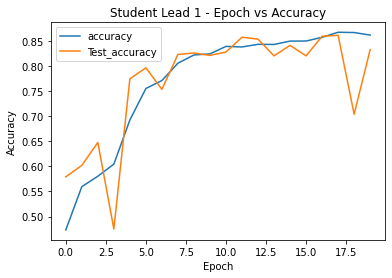

In [56]:
plt.plot(hist0.history['accuracy'])
plt.plot(hist0.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead 1 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

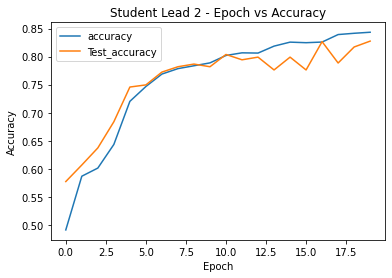

In [57]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead 2 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

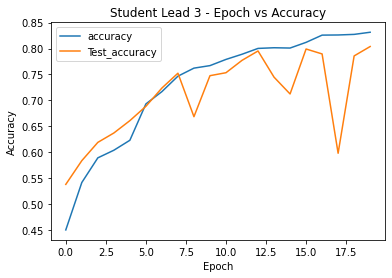

In [58]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead 3 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

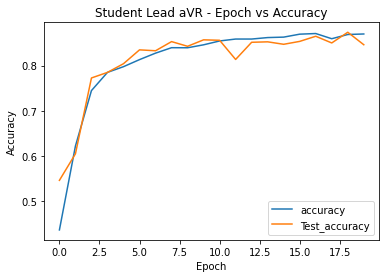

In [59]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead aVR - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

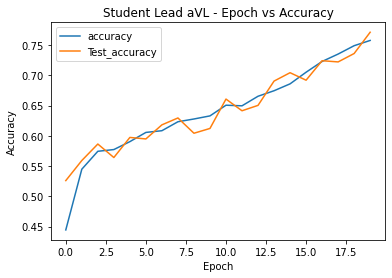

In [60]:
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead aVL - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

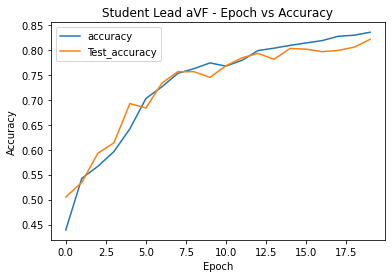

In [61]:
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead aVF - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

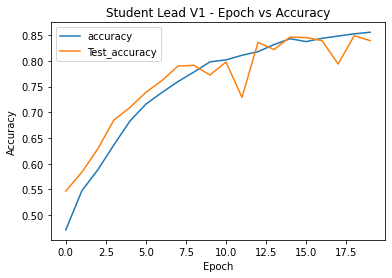

In [62]:
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V1 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

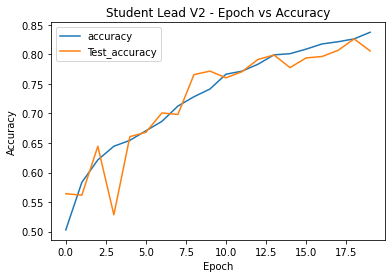

In [63]:
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V2 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

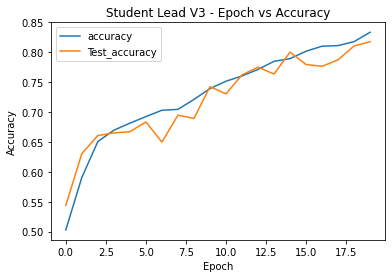

In [64]:
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V3 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

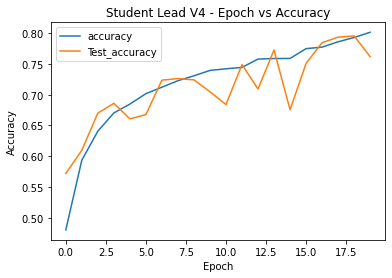

In [65]:
plt.plot(hist9.history['accuracy'])
plt.plot(hist9.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V4 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

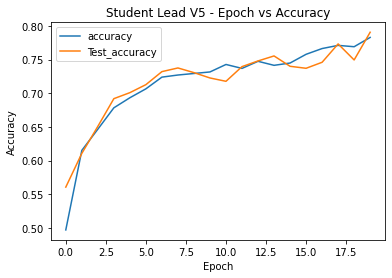

In [66]:
plt.plot(hist10.history['accuracy'])
plt.plot(hist10.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V5 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

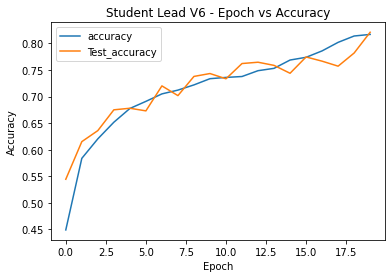

In [67]:
plt.plot(hist11.history['accuracy'])
plt.plot(hist11.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V6 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Loss Graph
<font color=#FF0000>**2nd Graph**</font>

Text(0, 0.5, 'Loss')

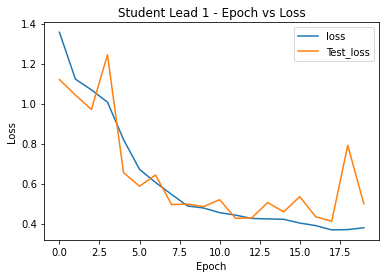

In [68]:
plt.plot(hist0.history['loss'])
plt.plot(hist0.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead 1 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

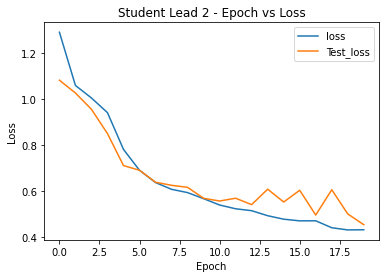

In [69]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead 2 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

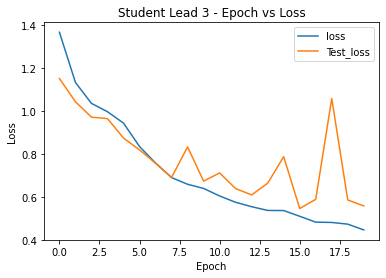

In [70]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead 3 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

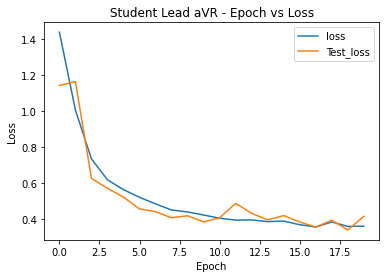

In [71]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead aVR - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

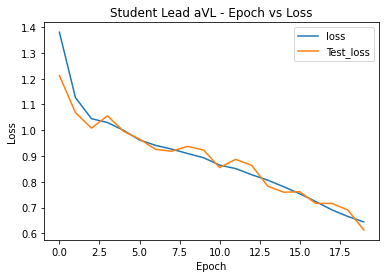

In [72]:
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead aVL - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

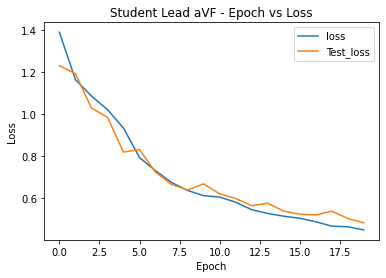

In [73]:
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead aVF - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

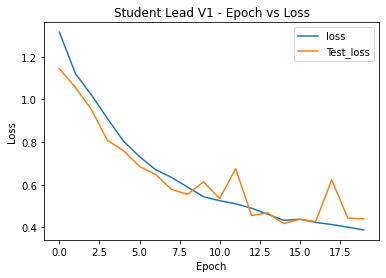

In [74]:
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V1 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

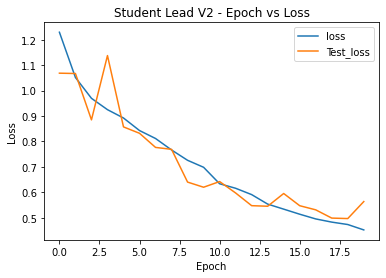

In [75]:
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V2 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

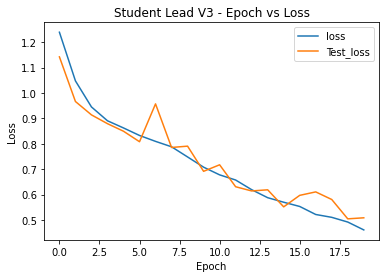

In [76]:
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V3 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

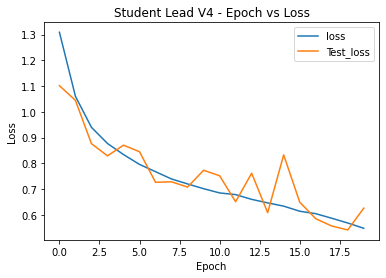

In [77]:
plt.plot(hist9.history['loss'])
plt.plot(hist9.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V4 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

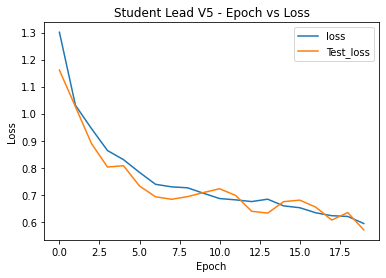

In [78]:
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V5 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

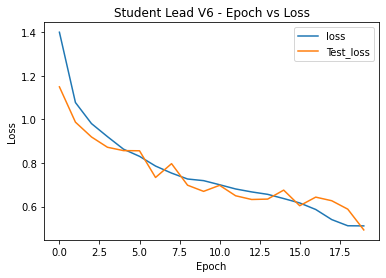

In [79]:
plt.plot(hist11.history['loss'])
plt.plot(hist11.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V6 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [80]:
predictions = stu_0.predict(l0_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l0_y_test, pred))

64/64 [==============================] - 7s 100ms/step
              precision    recall  f1-score   support

           0       0.12      0.01      0.02        85
           1       0.67      0.89      0.77       362
           2       0.94      0.91      0.92       769
           3       0.87      0.72      0.79       374
           4       0.83      0.85      0.84       317
           5       0.66      0.90      0.77       112

    accuracy                           0.82      2019
   macro avg       0.68      0.71      0.68      2019
weighted avg       0.81      0.82      0.81      2019



In [81]:
predictions = stu_1.predict(l1_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l1_y_test, pred))

64/64 [==============================] - 7s 102ms/step
              precision    recall  f1-score   support

           0       0.52      0.13      0.21        85
           1       0.74      0.86      0.80       362
           2       0.87      0.97      0.92       769
           3       0.82      0.73      0.78       374
           4       0.94      0.81      0.87       317
           5       0.73      0.71      0.72       112

    accuracy                           0.83      2019
   macro avg       0.77      0.70      0.71      2019
weighted avg       0.83      0.83      0.82      2019



In [82]:
predictions = stu_2.predict(l2_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l2_y_test, pred))

64/64 [==============================] - 7s 103ms/step
              precision    recall  f1-score   support

           0       0.64      0.34      0.45        85
           1       0.78      0.75      0.77       362
           2       0.89      0.95      0.92       769
           3       0.85      0.68      0.76       374
           4       0.82      0.90      0.86       317
           5       0.63      0.90      0.74       112

    accuracy                           0.83      2019
   macro avg       0.77      0.75      0.75      2019
weighted avg       0.83      0.83      0.82      2019



In [83]:
predictions = stu_3.predict(l3_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l3_y_test, pred))

64/64 [==============================] - 7s 103ms/step
              precision    recall  f1-score   support

           0       0.56      0.06      0.11        85
           1       0.66      0.94      0.78       362
           2       0.93      0.90      0.92       769
           3       0.98      0.74      0.84       374
           4       0.91      0.92      0.92       317
           5       0.70      0.87      0.77       112

    accuracy                           0.85      2019
   macro avg       0.79      0.74      0.72      2019
weighted avg       0.86      0.85      0.84      2019



In [84]:
predictions = stu_4.predict(l4_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l4_y_test, pred))

64/64 [==============================] - 7s 102ms/step
              precision    recall  f1-score   support

           0       0.57      0.09      0.16        85
           1       0.66      0.65      0.65       362
           2       0.85      0.94      0.89       769
           3       0.74      0.64      0.69       374
           4       0.76      0.81      0.79       317
           5       0.67      0.86      0.75       112

    accuracy                           0.77      2019
   macro avg       0.71      0.67      0.66      2019
weighted avg       0.76      0.77      0.76      2019



In [85]:
predictions = stu_5.predict(l5_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l5_y_test, pred))

64/64 [==============================] - 7s 102ms/step
              precision    recall  f1-score   support

           0       0.75      0.25      0.37        85
           1       0.74      0.77      0.75       362
           2       0.86      0.97      0.91       769
           3       0.80      0.68      0.74       374
           4       0.83      0.87      0.85       317
           5       0.82      0.75      0.78       112

    accuracy                           0.82      2019
   macro avg       0.80      0.71      0.73      2019
weighted avg       0.82      0.82      0.81      2019



In [86]:
predictions = stu_6.predict(l6_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l6_y_test, pred))

64/64 [==============================] - 7s 102ms/step
              precision    recall  f1-score   support

           0       0.45      0.31      0.36        85
           1       0.67      0.90      0.77       362
           2       0.93      0.94      0.94       769
           3       0.88      0.75      0.81       374
           4       0.94      0.79      0.86       317
           5       0.82      0.76      0.79       112

    accuracy                           0.84      2019
   macro avg       0.78      0.74      0.75      2019
weighted avg       0.85      0.84      0.84      2019



In [87]:
predictions = stu_7.predict(l7_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l7_y_test, pred))

64/64 [==============================] - 7s 102ms/step
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        85
           1       0.75      0.61      0.67       362
           2       0.87      0.99      0.92       769
           3       0.78      0.74      0.76       374
           4       0.72      0.91      0.81       317
           5       0.88      0.71      0.79       112

    accuracy                           0.81      2019
   macro avg       0.75      0.66      0.67      2019
weighted avg       0.79      0.81      0.78      2019



In [88]:
predictions = stu_8.predict(l8_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l8_y_test, pred))

64/64 [==============================] - 7s 102ms/step
              precision    recall  f1-score   support

           0       0.33      0.02      0.04        85
           1       0.68      0.72      0.70       362
           2       0.89      0.98      0.93       769
           3       0.87      0.74      0.80       374
           4       0.84      0.81      0.83       317
           5       0.65      0.91      0.76       112

    accuracy                           0.82      2019
   macro avg       0.71      0.70      0.68      2019
weighted avg       0.80      0.82      0.80      2019



In [89]:
predictions = stu_9.predict(l9_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l9_y_test, pred))

64/64 [==============================] - 7s 101ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.53      0.77      0.63       362
           2       0.83      0.98      0.90       769
           3       0.91      0.51      0.65       374
           4       0.92      0.69      0.79       317
           5       0.68      0.86      0.76       112

    accuracy                           0.76      2019
   macro avg       0.65      0.63      0.62      2019
weighted avg       0.76      0.76      0.74      2019



In [90]:
predictions = stu_10.predict(l10_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l10_y_test, pred))

64/64 [==============================] - 7s 103ms/step
              precision    recall  f1-score   support

           0       0.50      0.01      0.02        85
           1       0.65      0.59      0.62       362
           2       0.92      0.92      0.92       769
           3       0.72      0.81      0.76       374
           4       0.75      0.89      0.82       317
           5       0.72      0.78      0.75       112

    accuracy                           0.79      2019
   macro avg       0.71      0.67      0.65      2019
weighted avg       0.78      0.79      0.77      2019



In [91]:
predictions = stu_11.predict(l11_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l11_y_test, pred))

64/64 [==============================] - 7s 100ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.76      0.61      0.68       362
           2       0.88      0.98      0.93       769
           3       0.85      0.77      0.81       374
           4       0.86      0.91      0.89       317
           5       0.56      0.93      0.70       112

    accuracy                           0.82      2019
   macro avg       0.65      0.70      0.67      2019
weighted avg       0.79      0.82      0.80      2019



# Confusion Matrix
<font color=#FF0000>**Leads 1 to 12**</font>

64/64 [==============================] - 7s 102ms/step


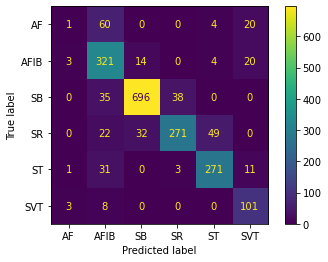

In [92]:
y_predicted =stu_0.predict(l0_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l0_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 7s 102ms/step


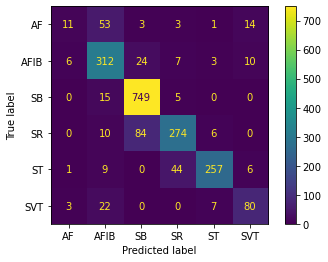

In [93]:
y_predicted =stu_1.predict(l1_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l1_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 6s 102ms/step


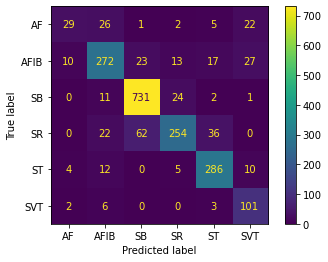

In [94]:
y_predicted =stu_2.predict(l2_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l2_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 6s 101ms/step


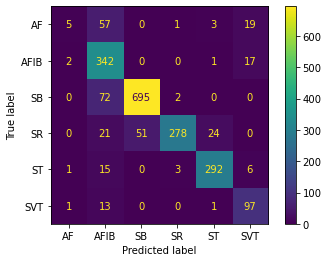

In [95]:
y_predicted =stu_3.predict(l3_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l3_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 6s 101ms/step


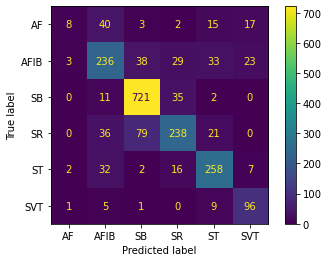

In [96]:
y_predicted =stu_4.predict(l4_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l4_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 7s 102ms/step


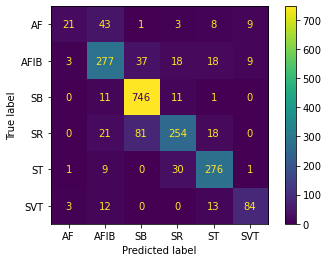

In [97]:
y_predicted =stu_5.predict(l5_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l5_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 7s 103ms/step


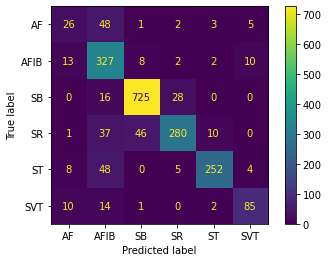

In [98]:
y_predicted =stu_6.predict(l6_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l6_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 7s 104ms/step


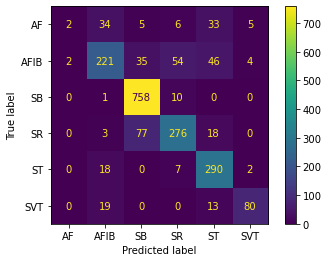

In [99]:
y_predicted =stu_7.predict(l7_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l7_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 7s 103ms/step


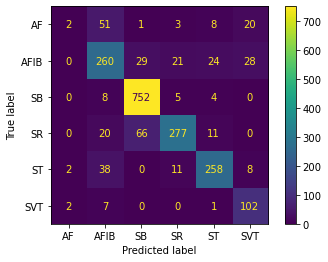

In [100]:
y_predicted =stu_8.predict(l8_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l8_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 7s 102ms/step


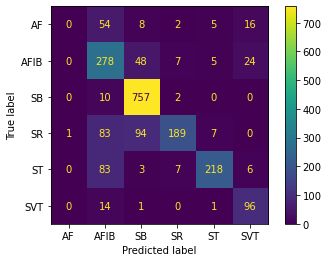

In [101]:
y_predicted =stu_9.predict(l9_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l9_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 7s 102ms/step


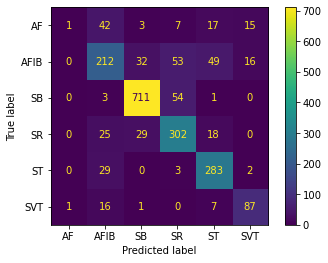

In [102]:
y_predicted =stu_10.predict(l10_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l10_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

64/64 [==============================] - 7s 102ms/step


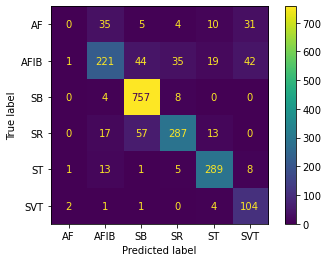

In [103]:
y_predicted =stu_11.predict(l11_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l11_y_test,y_pred),display_labels=['AF','AFIB','SB','SR','ST','SVT'])
disp.plot()
plt.show()

# Distillation
<font color=#FF0000>**Leads 1 to 12**</font>

In [104]:
distiller0 = Distiller(student=stu_0, teacher=teacher_final)
distiller0.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist0 = distiller0.fit((x_train,l0_x_train),(y_train,l0_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 109s 244ms/step - accuracy: 0.8664 - student_loss: 0.3640 - distillation_loss: 0.0137
Epoch 2/10
440/440 [==============================] - 107s 243ms/step - accuracy: 0.8691 - student_loss: 0.3561 - distillation_loss: 0.0135
Epoch 3/10
440/440 [==============================] - 106s 241ms/step - accuracy: 0.8779 - student_loss: 0.3257 - distillation_loss: 0.0120
Epoch 4/10
440/440 [==============================] - 106s 242ms/step - accuracy: 0.8785 - student_loss: 0.3266 - distillation_loss: 0.0121
Epoch 5/10
440/440 [==============================] - 107s 242ms/step - accuracy: 0.8829 - student_loss: 0.3206 - distillation_loss: 0.0119
Epoch 6/10
440/440 [==============================] - 107s 242ms/step - accuracy: 0.8866 - student_loss: 0.3167 - distillation_loss: 0.0117
Epoch 7/10
440/440 [==============================] - 106s 242ms/step - accuracy: 0.8900 - student_loss: 0.3023 - distillation_loss: 0.0111
Epoch 8/10
440/440 [

In [105]:
distiller1 = Distiller(student=stu_1, teacher=teacher_final)
distiller1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist1 = distiller1.fit((x_train,l1_x_train),(y_train,l1_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 107s 239ms/step - accuracy: 0.8430 - student_loss: 0.4201 - distillation_loss: 0.0159
Epoch 2/10
440/440 [==============================] - 105s 238ms/step - accuracy: 0.8516 - student_loss: 0.4067 - distillation_loss: 0.0152
Epoch 3/10
440/440 [==============================] - 105s 238ms/step - accuracy: 0.8594 - student_loss: 0.3945 - distillation_loss: 0.0146
Epoch 4/10
440/440 [==============================] - 105s 239ms/step - accuracy: 0.8602 - student_loss: 0.3931 - distillation_loss: 0.0145
Epoch 5/10
440/440 [==============================] - 105s 238ms/step - accuracy: 0.8568 - student_loss: 0.3923 - distillation_loss: 0.0146
Epoch 6/10
440/440 [==============================] - 105s 238ms/step - accuracy: 0.8672 - student_loss: 0.3750 - distillation_loss: 0.0137
Epoch 7/10
440/440 [==============================] - 105s 238ms/step - accuracy: 0.8622 - student_loss: 0.3769 - distillation_loss: 0.0141
Epoch 8/10
440/440 [

In [106]:
distiller2 = Distiller(student=stu_2, teacher=teacher_final)
distiller2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist2 = distiller2.fit((x_train,l2_x_train),(y_train,l2_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 108s 241ms/step - accuracy: 0.8367 - student_loss: 0.4412 - distillation_loss: 0.0171
Epoch 2/10
440/440 [==============================] - 105s 238ms/step - accuracy: 0.8466 - student_loss: 0.4232 - distillation_loss: 0.0163
Epoch 3/10
440/440 [==============================] - 105s 238ms/step - accuracy: 0.8463 - student_loss: 0.4292 - distillation_loss: 0.0164
Epoch 4/10
440/440 [==============================] - 3188s 7s/step - accuracy: 0.8497 - student_loss: 0.4078 - distillation_loss: 0.0157
Epoch 5/10
440/440 [==============================] - 78s 177ms/step - accuracy: 0.8584 - student_loss: 0.3936 - distillation_loss: 0.0152
Epoch 6/10
440/440 [==============================] - 78s 177ms/step - accuracy: 0.8560 - student_loss: 0.3890 - distillation_loss: 0.0149
Epoch 7/10
440/440 [==============================] - 80s 182ms/step - accuracy: 0.8564 - student_loss: 0.3981 - distillation_loss: 0.0154
Epoch 8/10
440/440 [=====

In [107]:
distiller3 = Distiller(student=stu_3, teacher=teacher_final)
distiller3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist3 = distiller3.fit((x_train,l3_x_train),(y_train,l3_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 89s 200ms/step - accuracy: 0.8780 - student_loss: 0.3398 - distillation_loss: 0.0121
Epoch 2/10
440/440 [==============================] - 88s 200ms/step - accuracy: 0.8739 - student_loss: 0.3491 - distillation_loss: 0.0126
Epoch 3/10
440/440 [==============================] - 88s 199ms/step - accuracy: 0.8830 - student_loss: 0.3223 - distillation_loss: 0.0115
Epoch 4/10
440/440 [==============================] - 84s 191ms/step - accuracy: 0.8783 - student_loss: 0.3318 - distillation_loss: 0.0121
Epoch 5/10
440/440 [==============================] - 79s 180ms/step - accuracy: 0.8884 - student_loss: 0.3174 - distillation_loss: 0.0113
Epoch 6/10
440/440 [==============================] - 79s 180ms/step - accuracy: 0.8903 - student_loss: 0.3086 - distillation_loss: 0.0110
Epoch 7/10
440/440 [==============================] - 82s 185ms/step - accuracy: 0.8871 - student_loss: 0.3228 - distillation_loss: 0.0116
Epoch 8/10
440/440 [=======

In [108]:
distiller4 =Distiller(student=stu_4, teacher=teacher_final)
distiller4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist4 = distiller4.fit((x_train,l4_x_train),(y_train,l4_y_train), epochs=20,batch_size=16)

Epoch 1/20
440/440 [==============================] - 85s 186ms/step - accuracy: 0.7643 - student_loss: 0.6238 - distillation_loss: 0.0240
Epoch 2/20
440/440 [==============================] - 80s 182ms/step - accuracy: 0.7720 - student_loss: 0.6027 - distillation_loss: 0.0232
Epoch 3/20
440/440 [==============================] - 80s 182ms/step - accuracy: 0.7807 - student_loss: 0.5860 - distillation_loss: 0.0223
Epoch 4/20
440/440 [==============================] - 79s 180ms/step - accuracy: 0.7872 - student_loss: 0.5756 - distillation_loss: 0.0221
Epoch 5/20
440/440 [==============================] - 80s 182ms/step - accuracy: 0.7807 - student_loss: 0.5763 - distillation_loss: 0.0222
Epoch 6/20
440/440 [==============================] - 79s 180ms/step - accuracy: 0.7959 - student_loss: 0.5501 - distillation_loss: 0.0209
Epoch 7/20
440/440 [==============================] - 79s 179ms/step - accuracy: 0.7832 - student_loss: 0.5642 - distillation_loss: 0.0217
Epoch 8/20
440/440 [=======

In [109]:
distiller5 = Distiller(student=stu_5, teacher=teacher_final)
distiller5.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist5 = distiller5.fit((x_train,l5_x_train),(y_train,l5_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 84s 188ms/step - accuracy: 0.8383 - student_loss: 0.4398 - distillation_loss: 0.0173
Epoch 2/10
440/440 [==============================] - 84s 192ms/step - accuracy: 0.8451 - student_loss: 0.4241 - distillation_loss: 0.0166
Epoch 3/10
440/440 [==============================] - 89s 202ms/step - accuracy: 0.8469 - student_loss: 0.4257 - distillation_loss: 0.0167
Epoch 4/10
440/440 [==============================] - 88s 199ms/step - accuracy: 0.8460 - student_loss: 0.4180 - distillation_loss: 0.0165
Epoch 5/10
440/440 [==============================] - 88s 200ms/step - accuracy: 0.8506 - student_loss: 0.4107 - distillation_loss: 0.0161
Epoch 6/10
440/440 [==============================] - 82s 186ms/step - accuracy: 0.8582 - student_loss: 0.3947 - distillation_loss: 0.0153
Epoch 7/10
440/440 [==============================] - 79s 180ms/step - accuracy: 0.8568 - student_loss: 0.3864 - distillation_loss: 0.0151
Epoch 8/10
440/440 [=======

In [110]:
distiller6 = Distiller(student=stu_6, teacher=teacher_final)
distiller6.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist6 = distiller6.fit((x_train,l6_x_train),(y_train,l6_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 90s 201ms/step - accuracy: 0.8625 - student_loss: 0.3726 - distillation_loss: 0.0136
Epoch 2/10
440/440 [==============================] - 87s 199ms/step - accuracy: 0.8655 - student_loss: 0.3753 - distillation_loss: 0.0138
Epoch 3/10
440/440 [==============================] - 82s 187ms/step - accuracy: 0.8742 - student_loss: 0.3543 - distillation_loss: 0.0129
Epoch 4/10
440/440 [==============================] - 79s 180ms/step - accuracy: 0.8735 - student_loss: 0.3493 - distillation_loss: 0.0129
Epoch 5/10
440/440 [==============================] - 79s 181ms/step - accuracy: 0.8814 - student_loss: 0.3325 - distillation_loss: 0.0120
Epoch 6/10
440/440 [==============================] - 83s 190ms/step - accuracy: 0.8826 - student_loss: 0.3305 - distillation_loss: 0.0120
Epoch 7/10
440/440 [==============================] - 89s 202ms/step - accuracy: 0.8796 - student_loss: 0.3401 - distillation_loss: 0.0124
Epoch 8/10
440/440 [=======

In [111]:
distiller7 = Distiller(student=stu_7, teacher=teacher_final)
distiller7.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist7 = distiller7.fit((x_train,l7_x_train),(y_train,l7_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 81s 182ms/step - accuracy: 0.8362 - student_loss: 0.4418 - distillation_loss: 0.0158
Epoch 2/10
440/440 [==============================] - 79s 180ms/step - accuracy: 0.8395 - student_loss: 0.4406 - distillation_loss: 0.0156
Epoch 3/10
440/440 [==============================] - 83s 188ms/step - accuracy: 0.8456 - student_loss: 0.4225 - distillation_loss: 0.0150
Epoch 4/10
440/440 [==============================] - 90s 204ms/step - accuracy: 0.8406 - student_loss: 0.4308 - distillation_loss: 0.0153
Epoch 5/10
440/440 [==============================] - 88s 201ms/step - accuracy: 0.8450 - student_loss: 0.4185 - distillation_loss: 0.0148
Epoch 6/10
440/440 [==============================] - 88s 199ms/step - accuracy: 0.8520 - student_loss: 0.4109 - distillation_loss: 0.0146
Epoch 7/10
440/440 [==============================] - 84s 192ms/step - accuracy: 0.8524 - student_loss: 0.4072 - distillation_loss: 0.0143
Epoch 8/10
440/440 [=======

In [112]:
distiller8 = Distiller(student=stu_8, teacher=teacher_final)
distiller8.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist8 = distiller8.fit((x_train,l8_x_train),(y_train,l8_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 90s 201ms/step - accuracy: 0.8295 - student_loss: 0.4667 - distillation_loss: 0.0169
Epoch 2/10
440/440 [==============================] - 89s 202ms/step - accuracy: 0.8369 - student_loss: 0.4480 - distillation_loss: 0.0161
Epoch 3/10
440/440 [==============================] - 88s 200ms/step - accuracy: 0.8377 - student_loss: 0.4477 - distillation_loss: 0.0160
Epoch 4/10
440/440 [==============================] - 82s 187ms/step - accuracy: 0.8446 - student_loss: 0.4248 - distillation_loss: 0.0152
Epoch 5/10
440/440 [==============================] - 80s 181ms/step - accuracy: 0.8567 - student_loss: 0.4160 - distillation_loss: 0.0146
Epoch 6/10
440/440 [==============================] - 79s 180ms/step - accuracy: 0.8497 - student_loss: 0.4203 - distillation_loss: 0.0149
Epoch 7/10
440/440 [==============================] - 85s 192ms/step - accuracy: 0.8538 - student_loss: 0.4105 - distillation_loss: 0.0145
Epoch 8/10
440/440 [=======

In [113]:
distiller9 = Distiller(student=stu_9, teacher=teacher_final)
distiller9.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist9 = distiller9.fit((x_train,l9_x_train),(y_train,l9_y_train), epochs=20,batch_size=16)

Epoch 1/20
440/440 [==============================] - 80s 176ms/step - accuracy: 0.8030 - student_loss: 0.5438 - distillation_loss: 0.0199
Epoch 2/20
440/440 [==============================] - 73s 166ms/step - accuracy: 0.8144 - student_loss: 0.5110 - distillation_loss: 0.0188
Epoch 3/20
440/440 [==============================] - 74s 169ms/step - accuracy: 0.8205 - student_loss: 0.4944 - distillation_loss: 0.0181
Epoch 4/20
440/440 [==============================] - 75s 170ms/step - accuracy: 0.8217 - student_loss: 0.4874 - distillation_loss: 0.0180
Epoch 5/20
440/440 [==============================] - 82s 187ms/step - accuracy: 0.8245 - student_loss: 0.4741 - distillation_loss: 0.0172
Epoch 6/20
440/440 [==============================] - 83s 189ms/step - accuracy: 0.8274 - student_loss: 0.4732 - distillation_loss: 0.0174
Epoch 7/20
440/440 [==============================] - 82s 187ms/step - accuracy: 0.8291 - student_loss: 0.4595 - distillation_loss: 0.0167
Epoch 8/20
440/440 [=======

In [114]:
distiller10 = Distiller(student=stu_10, teacher=teacher_final)
distiller10.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist10 = distiller10.fit((x_train,l10_x_train),(y_train,l10_y_train), epochs=20,batch_size=16)

Epoch 1/20
440/440 [==============================] - 108s 242ms/step - accuracy: 0.7936 - student_loss: 0.5677 - distillation_loss: 0.0208
Epoch 2/20
440/440 [==============================] - 108s 245ms/step - accuracy: 0.8074 - student_loss: 0.5389 - distillation_loss: 0.0196
Epoch 3/20
440/440 [==============================] - 108s 244ms/step - accuracy: 0.8173 - student_loss: 0.5103 - distillation_loss: 0.0183
Epoch 4/20
440/440 [==============================] - 107s 243ms/step - accuracy: 0.8326 - student_loss: 0.4747 - distillation_loss: 0.0167
Epoch 5/20
440/440 [==============================] - 106s 241ms/step - accuracy: 0.8311 - student_loss: 0.4849 - distillation_loss: 0.0170
Epoch 6/20
440/440 [==============================] - 105s 239ms/step - accuracy: 0.8383 - student_loss: 0.4500 - distillation_loss: 0.0157
Epoch 7/20
440/440 [==============================] - 103s 235ms/step - accuracy: 0.8417 - student_loss: 0.4467 - distillation_loss: 0.0158
Epoch 8/20
440/440 [

In [115]:
distiller11 = Distiller(student=stu_11, teacher=teacher_final)
distiller11.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist11 = distiller11.fit((x_train,l11_x_train),(y_train,l11_y_train), epochs=20,batch_size=16)

Epoch 1/20
440/440 [==============================] - 84s 188ms/step - accuracy: 0.8265 - student_loss: 0.4814 - distillation_loss: 0.0174
Epoch 2/20
440/440 [==============================] - 80s 182ms/step - accuracy: 0.8249 - student_loss: 0.4750 - distillation_loss: 0.0173
Epoch 3/20
440/440 [==============================] - 79s 180ms/step - accuracy: 0.8259 - student_loss: 0.4757 - distillation_loss: 0.0174
Epoch 4/20
440/440 [==============================] - 82s 186ms/step - accuracy: 0.8309 - student_loss: 0.4611 - distillation_loss: 0.0168
Epoch 5/20
440/440 [==============================] - 89s 202ms/step - accuracy: 0.8373 - student_loss: 0.4486 - distillation_loss: 0.0162
Epoch 6/20
440/440 [==============================] - 89s 202ms/step - accuracy: 0.8355 - student_loss: 0.4500 - distillation_loss: 0.0163
Epoch 7/20
440/440 [==============================] - 89s 202ms/step - accuracy: 0.8417 - student_loss: 0.4464 - distillation_loss: 0.0163
Epoch 8/20
440/440 [=======

# Distillation Accuracy

In [116]:
distiller0.evaluate((x_test,l0_x_test), (y_test,l0_y_test))

64/64 [==============================] - 6s 86ms/step - accuracy: 0.8653 - student_loss: 0.4105


[0.8652798533439636, 1.6144285202026367]

In [117]:
distiller1.evaluate((x_test,l1_x_test), (y_test,l1_y_test))

64/64 [==============================] - 6s 88ms/step - accuracy: 0.8539 - student_loss: 0.4267


[0.8538880348205566, 1.8052829504013062]

In [118]:
distiller2.evaluate((x_test,l2_x_test), (y_test,l2_y_test))

64/64 [==============================] - 6s 89ms/step - accuracy: 0.7687 - student_loss: 0.6526


[0.7686973810195923, 1.9329754114151]

In [119]:
distiller3.evaluate((x_test,l3_x_test), (y_test,l3_y_test))

64/64 [==============================] - 6s 87ms/step - accuracy: 0.8757 - student_loss: 0.3903


[0.8756810426712036, 2.2892231941223145]

In [120]:
distiller4.evaluate((x_test,l4_x_test), (y_test,l4_y_test))

64/64 [==============================] - 6s 87ms/step - accuracy: 0.7964 - student_loss: 0.5688


[0.7964338660240173, 0.9784056544303894]

In [121]:
distiller5.evaluate((x_test,l5_x_test), (y_test,l5_y_test))

64/64 [==============================] - 6s 87ms/step - accuracy: 0.8465 - student_loss: 0.4684


[0.8464586138725281, 2.2681725025177]

In [122]:
distiller6.evaluate((x_test,l6_x_test), (y_test,l6_y_test))

64/64 [==============================] - 6s 88ms/step - accuracy: 0.8712 - student_loss: 0.3912


[0.8712233901023865, 1.477236270904541]

In [123]:
distiller7.evaluate((x_test,l7_x_test), (y_test,l7_y_test))

64/64 [==============================] - 6s 85ms/step - accuracy: 0.8331 - student_loss: 0.4804


[0.8330857157707214, 1.6557003259658813]

In [124]:
distiller8.evaluate((x_test,l8_x_test), (y_test,l8_y_test))

64/64 [==============================] - 6s 91ms/step - accuracy: 0.8123 - student_loss: 0.5264


[0.8122833371162415, 2.1933765411376953]

In [125]:
distiller9.evaluate((x_test,l9_x_test), (y_test,l9_y_test))

64/64 [==============================] - 6s 87ms/step - accuracy: 0.8410 - student_loss: 0.4644


[0.8410103917121887, 1.5937408208847046]

In [126]:
distiller10.evaluate((x_test,l10_x_test), (y_test,l10_y_test))

64/64 [==============================] - 6s 88ms/step - accuracy: 0.8534 - student_loss: 0.4303


[0.8533927798271179, 1.249968409538269]

In [127]:
distiller11.evaluate((x_test,l11_x_test), (y_test,l11_y_test))

64/64 [==============================] - 7s 101ms/step - accuracy: 0.8262 - student_loss: 0.5052


[0.8261515498161316, 1.6017976999282837]

# Graph
<font color=#FF0000>**Accuracy**</font>

Text(0, 0.5, 'Accuracy')

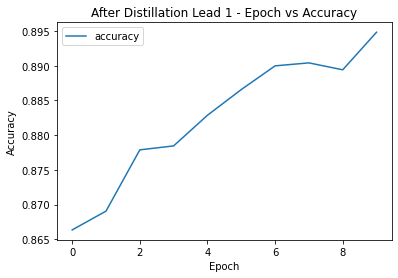

In [128]:
plt.plot(d_hist0.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead 1 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

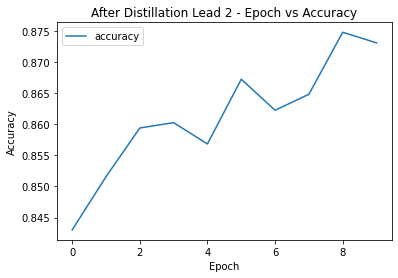

In [129]:
plt.plot(d_hist1.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead 2 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

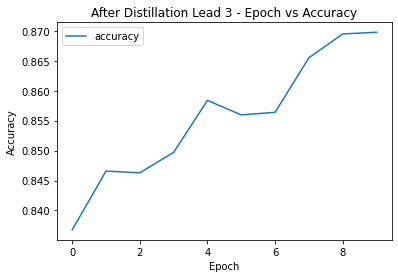

In [130]:
plt.plot(d_hist2.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead 3 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

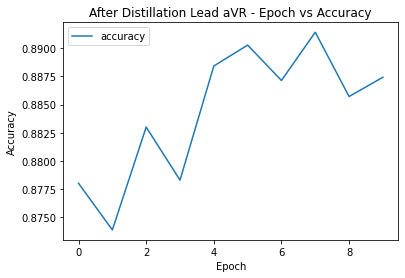

In [131]:
plt.plot(d_hist3.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead aVR - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

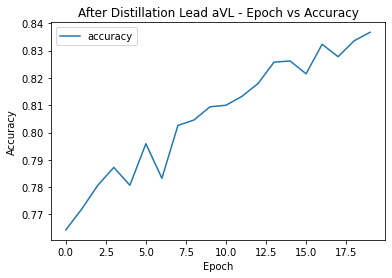

In [132]:
plt.plot(d_hist4.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead aVL - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

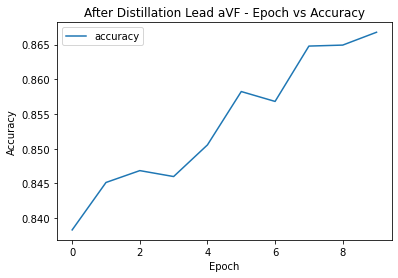

In [133]:
plt.plot(d_hist5.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead aVF - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

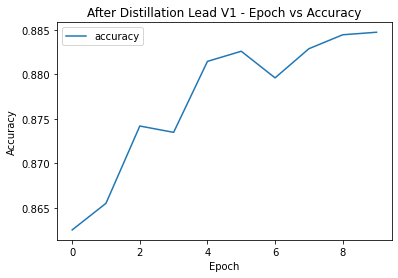

In [134]:
plt.plot(d_hist6.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V1 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

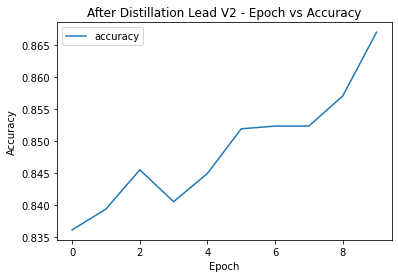

In [135]:
plt.plot(d_hist7.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V2 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

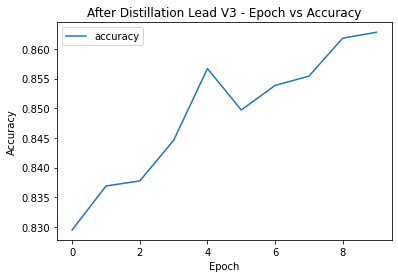

In [136]:
plt.plot(d_hist8.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V3 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

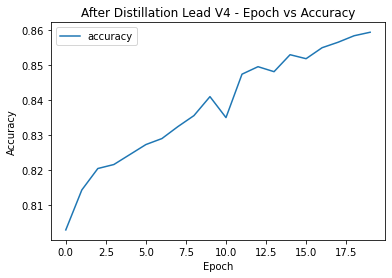

In [137]:
plt.plot(d_hist9.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V4 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

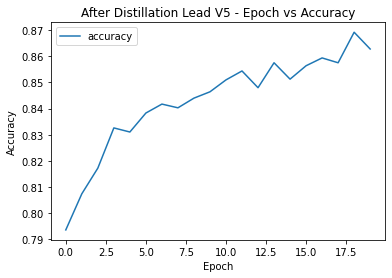

In [138]:
plt.plot(d_hist10.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V5 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

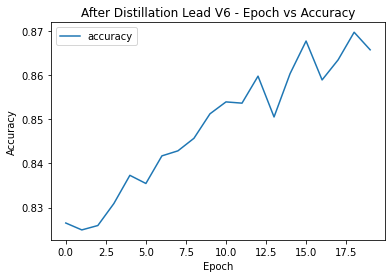

In [139]:
plt.plot(d_hist11.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V6 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

<font color=#FF0000>**Loss**</font>

Text(0, 0.5, 'Loss')

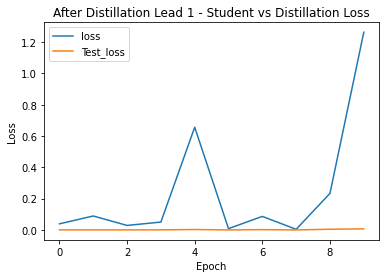

In [140]:
plt.plot(d_hist0.history['student_loss'])
plt.plot(d_hist0.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead 1 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

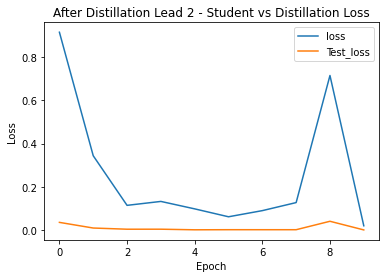

In [141]:
plt.plot(d_hist1.history['student_loss'])
plt.plot(d_hist1.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead 2 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

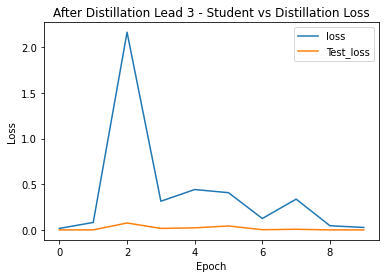

In [142]:
plt.plot(d_hist2.history['student_loss'])
plt.plot(d_hist2.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead 3 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

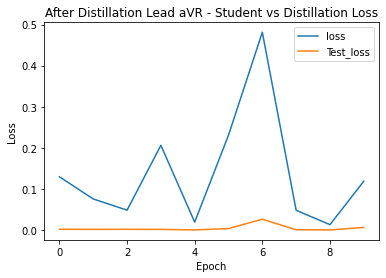

In [143]:
plt.plot(d_hist3.history['student_loss'])
plt.plot(d_hist3.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead aVR - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

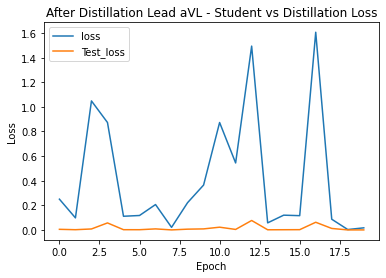

In [144]:
plt.plot(d_hist4.history['student_loss'])
plt.plot(d_hist4.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead aVL - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

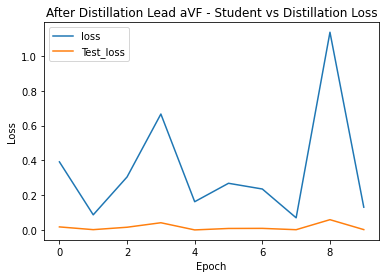

In [145]:
plt.plot(d_hist5.history['student_loss'])
plt.plot(d_hist5.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead aVF - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

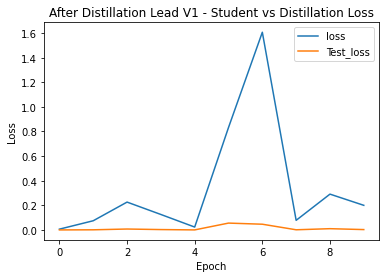

In [146]:
plt.plot(d_hist6.history['student_loss'])
plt.plot(d_hist6.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V1 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

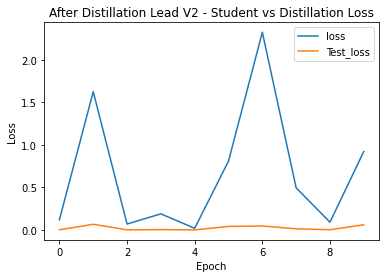

In [147]:
plt.plot(d_hist7.history['student_loss'])
plt.plot(d_hist7.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V2 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

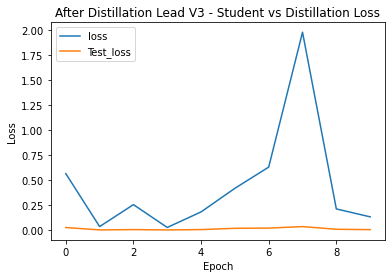

In [148]:
plt.plot(d_hist8.history['student_loss'])
plt.plot(d_hist8.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V3 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

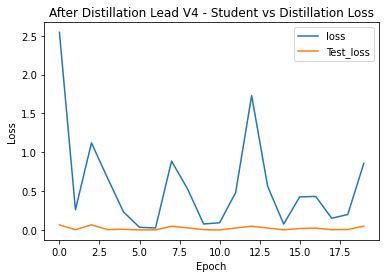

In [149]:
plt.plot(d_hist9.history['student_loss'])
plt.plot(d_hist9.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V4 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

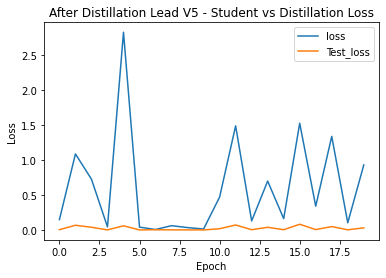

In [150]:
plt.plot(d_hist10.history['student_loss'])
plt.plot(d_hist10.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V5 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

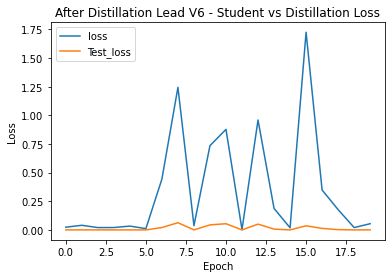

In [151]:
plt.plot(d_hist11.history['student_loss'])
plt.plot(d_hist11.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V6 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')